In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  4 18:16:40 2021

@author: pmarc
Résolution Problème L10 - #2 par Pierre-Marc Juneau, 8 avril 2021

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
# statsmodels.formula.api import ols


In [2]:


donnee = pd.read_csv('../Fichiers/DonneesMarketingv0r3.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)
donnee=donnee.dropna()
donnee = donnee.drop('Date', 1)
donnee2=pd.get_dummies(donnee)
MatriceCorr=donnee2.corr()


X=donnee
X=X.drop({'ID','Vins ($/2sem)'},1)
X=pd.get_dummies(X)
MatriceR = X.corr()


X = X.drop('Statut Mat_Autre', 1)
Y=donnee[["Vins ($/2sem)"]]
X=pd.get_dummies(X)
Xmat=X.assign(const=1).values
Ymat=Y.values.reshape(-1,1)
n=Xmat.shape[0]
p=Xmat.shape[1]

"Ronde 1"
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


/tmp/ipykernel_34569/2506102490.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  donnee = donnee.drop('Date', 1)
/tmp/ipykernel_34569/2506102490.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'ID','Vins ($/2sem)'},1)
/tmp/ipykernel_34569/2506102490.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('Statut Mat_Autre', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vins ($/2sem)   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     181.4
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:55:40   Log-Likelihood:                -14962.
No. Observations:                2216   AIC:                         2.997e+04
Df Residuals:                    2195   BIC:                         3.009e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Âge                                       0.8928      0.416      2.148      0.032       0.078       1.708
Revenus                                   0.0024      0.000      9.559      0.000       0.002       0.003
Enfants                                 -46.3129     11.215     -4.129      0.000     -68.306     -24.319
Adolescents                              -1.5657     10.235     -0.153      0.878     -21.638      18.506
Temps depuis dernier achat                0.1307      0.153      0.853      0.394      -0.170       0.431
Fruits ($/2sem)                          -0.3235      0.155     -2.092      0.037      -0.627      -0.020
Viandes ($/2sem)                          0.2425      0.034      7.199      0.000       0.176       0.309
Poisson ($/2sem)                         -0.3094      0.117     -2.650      0.008      -0.538      -0.080
Sucreries ($/2sem)                       -0.3660      0.148     -2.465      0.014      -0.657      -0.075
Joaillerie ($/2sem)                       0.1542      0.104      1.488      0.137      -0.049       0.357
Achats avec rabais                      -14.5420      2.927     -4.968      0.000     -20.283      -8.801
Achats web                               24.0335      2.202     10.916      0.000      19.716      28.351
Achats catalogues                        31.6702      2.535     12.495      0.000      26.700      36.641
Achats en magasin                        32.3006      1.963     16.457      0.000      28.452      36.150
Nombre de visite sites web (par mois)    23.3720      2.720      8.591      0.000      18.037      28.707
Statut Mat_Conjoint de fait              56.5751    105.092      0.538      0.590    -149.514     262.665
Statut Mat_Célibataire                   52.2881    105.161      0.497      0.619    -153.938     258.515
Statut Mat_Divorcé                       64.0725    105.629      0.607      0.544    -143.071     271.216
Statut Mat_Marié                         52.1467    104.972      0.497      0.619    -153.708     258.001
Statut Mat_Veuf                          49.9080    107.487      0.464      0.642    -160.878     260.694
const                                  -385.2599    108.608     -3.547      0.000    -598.244    -172.275
==============================================================================
Omnibus:                      467.049   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4378.237
Skew:                           0.718   Prob(JB):                         0.00
Kurtosis:                       9.735   Cond. No.                     3.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of 

In [3]:

"Ronde 2"
X=donnee
X=X.drop({'ID','Vins ($/2sem)','Statut Mat','Adolescents'},1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


/tmp/ipykernel_34569/1633400281.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'ID','Vins ($/2sem)','Statut Mat','Adolescents'},1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vins ($/2sem)   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     259.6
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:57:17   Log-Likelihood:                -14963.
No. Observations:                2216   AIC:                         2.996e+04
Df Residuals:                    2201   BIC:                         3.004e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Âge                                       0.9042      0.389      2.326      0.020       0.142       1.667
Revenus                                   0.0024      0.000      9.666      0.000       0.002       0.003
Enfants                                 -45.8259     11.071     -4.139      0.000     -67.537     -24.115
Temps depuis dernier achat                0.1344      0.153      0.879      0.379      -0.165       0.434
Fruits ($/2sem)                          -0.3203      0.154     -2.076      0.038      -0.623      -0.018
Viandes ($/2sem)                          0.2434      0.033      7.440      0.000       0.179       0.308
Poisson ($/2sem)                         -0.3116      0.116     -2.688      0.007      -0.539      -0.084
Sucreries ($/2sem)                       -0.3627      0.148     -2.451      0.014      -0.653      -0.073
Joaillerie ($/2sem)                       0.1522      0.103      1.472      0.141      -0.051       0.355
Achats avec rabais                      -14.7538      2.731     -5.402      0.000     -20.110      -9.397
Achats web                               24.0378      2.194     10.958      0.000      19.736      28.340
Achats catalogues                        31.7049      2.527     12.547      0.000      26.750      36.660
Achats en magasin                        32.2948      1.958     16.494      0.000      28.455      36.134
Nombre de visite sites web (par mois)    23.4562      2.712      8.650      0.000      18.138      28.774
const                                  -332.7890     32.240    -10.322      0.000    -396.013    -269.565
==============================================================================
Omnibus:                      468.282   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4357.953
Skew:                           0.723   Prob(JB):                         0.00
Kurtosis:                       9.716   Cond. No.                     4.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:

"Ronde 3"
X=X.drop({'Temps depuis dernier achat','Joaillerie ($/2sem)'},1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


/tmp/ipykernel_34569/645420852.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'Temps depuis dernier achat','Joaillerie ($/2sem)'},1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vins ($/2sem)   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     302.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:57:44   Log-Likelihood:                -14964.
No. Observations:                2216   AIC:                         2.995e+04
Df Residuals:                    2203   BIC:                         3.003e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Âge                                       0.8944      0.389      2.302      0.021       0.132       1.656
Revenus                                   0.0024      0.000      9.618      0.000       0.002       0.003
Enfants                                 -47.0249     11.024     -4.266      0.000     -68.644     -25.406
Fruits ($/2sem)                          -0.2982      0.153     -1.944      0.052      -0.599       0.003
Viandes ($/2sem)                          0.2414      0.033      7.388      0.000       0.177       0.305
Poisson ($/2sem)                         -0.2868      0.115     -2.504      0.012      -0.511      -0.062
Sucreries ($/2sem)                       -0.3555      0.148     -2.404      0.016      -0.646      -0.066
Achats avec rabais                      -14.4740      2.726     -5.311      0.000     -19.819      -9.129
Achats web                               24.6131      2.159     11.402      0.000      20.380      28.846
Achats catalogues                        32.2796      2.501     12.904      0.000      27.374      37.185
Achats en magasin                        32.3465      1.958     16.520      0.000      28.507      36.186
Nombre de visite sites web (par mois)    23.3638      2.712      8.616      0.000      18.046      28.682
const                                  -323.5400     31.357    -10.318      0.000    -385.033    -262.047
==============================================================================
Omnibus:                      471.474   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4470.117
Skew:                           0.724   Prob(JB):                         0.00
Kurtosis:                       9.806   Cond. No.                     4.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:

"Ronde 4"
X=X.drop({'Fruits ($/2sem)'},1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

/tmp/ipykernel_34569/1310520892.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'Fruits ($/2sem)'},1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vins ($/2sem)   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     329.3
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:58:47   Log-Likelihood:                -14966.
No. Observations:                2216   AIC:                         2.996e+04
Df Residuals:                    2204   BIC:                         3.003e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Âge                                       0.9254      0.389      2.382      0.017       0.164       1.687
Revenus                                   0.0024      0.000      9.581      0.000       0.002       0.003
Enfants                                 -46.7209     11.030     -4.236      0.000     -68.351     -25.090
Viandes ($/2sem)                          0.2328      0.032      7.188      0.000       0.169       0.296
Poisson ($/2sem)                         -0.3447      0.111     -3.115      0.002      -0.562      -0.128
Sucreries ($/2sem)                       -0.4224      0.144     -2.935      0.003      -0.705      -0.140
Achats avec rabais                      -14.1869      2.723     -5.210      0.000     -19.527      -8.847
Achats web                               24.4350      2.158     11.323      0.000      20.203      28.667
Achats catalogues                        32.2406      2.503     12.881      0.000      27.332      37.149
Achats en magasin                        31.9753      1.950     16.398      0.000      28.151      35.799
Nombre de visite sites web (par mois)    23.5368      2.712      8.679      0.000      18.218      28.855
const                                  -325.8802     31.354    -10.394      0.000    -387.367    -264.394
==============================================================================
Omnibus:                      475.385   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4367.026
Skew:                           0.742   Prob(JB):                         0.00
Kurtosis:                       9.715   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

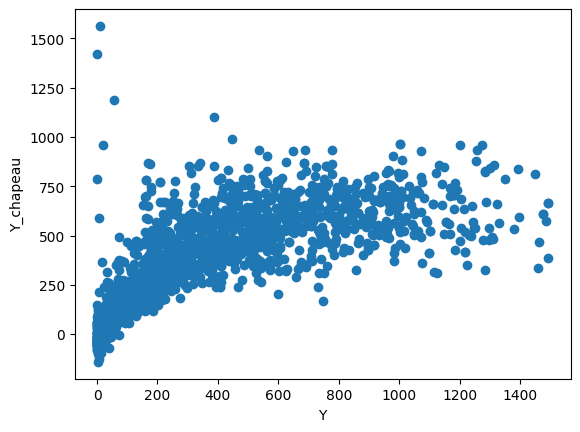

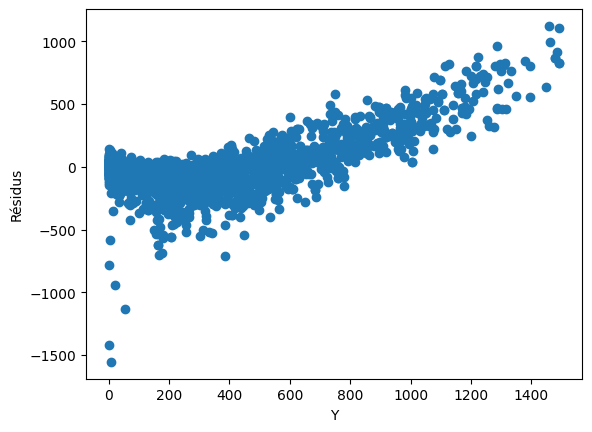

Text(0.5, 0, 'Y')

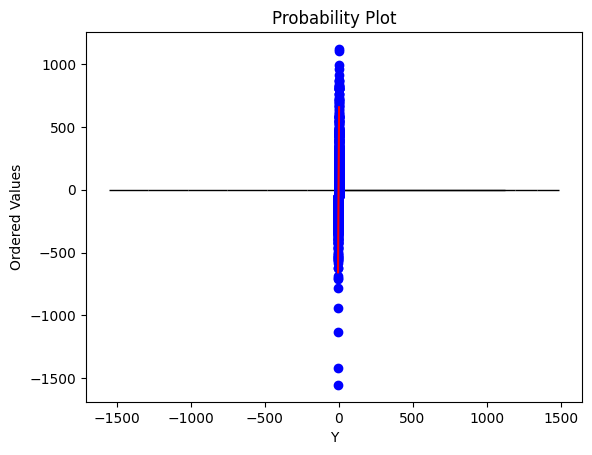

In [6]:


plt.scatter(Ymat, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()

Epsilon=Ymat-Y_chap.values.reshape(-1,1)
plt.figure(1)
plt.plot(Ymat, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()
sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))
ax=plt.hist(Epsilon,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Erreurs")

ax=plt.hist(Ymat,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Y")



